Tarea 2.
Analisis de sentimientos de un texto / comentarios

Se utilizo una sentencia de juicio de divorcio incausado y la cual tuvo fallo procedente, es decir las personas se divorciaron. 

Ubicacion y datos de la sentencia: JUZGADO MIXTO DE LO CIVIL Y FAMILIAR DE PRIMERA INSTANCIA DEL DUODECIMO DISTRITO JUDICIAL

Fecha de publicacion: 22/enero/2025

Materia: Familiar Oral

Expediente: INFORMACION SUPRIMIDA

Fuente: https://www.pjenl.gob.mx/SentenciasPublicas/Modulos/Familiar.aspx

In [1]:
import pdfplumber

# Ruta al archivo PDF
pdf_path = "/Users/USER/Desktop/sentencia-divorcio.pdf"

# Extracción del texto
with pdfplumber.open(pdf_path) as pdf:
    full_text = ""
    for page in pdf.pages:
        full_text += page.extract_text()

# Imprimir el texto extraído
print(full_text[:500])  # Ver las primeros 500 caracteres

“2025 año del Bicentenario de la Constitucionalidad en Nuevo León”
*OM060058754705*
PODER JUDICIAL DEL
ESTADO DE NUEVO LEÓN. OM060058754705
COORDINACION DE GESTION JUDICIAL JUICIOS EN ESTADO DE SENTENCIA Y SENTENCIADOS
DE LOS JUZGADOS DE JUICIO
CIVIL Y FAMILIAR ORAL SE DICTA SENTENCIA DEFINITIVA
DEL QUINTO DISTRITO JUDICIAL
CADEREYTA JIMENEZ, N. L.
0007
JUZGADO SEGUNDO DE JUICIO CIVIL Y FAMILIAR
ORAL
Cadereyta Jiménez, Nuevo León, a 15 quince de enero del año
2025 dos mil veinticinco.
Se procede


In [2]:
import re

import nltk
from nltk.corpus import stopwords

# Lista de stop words en español
stop_words = set(stopwords.words('spanish'))

# Función actualizada para limpiar texto y eliminar stop words
def clean_text(text):
    # Limpieza básica: eliminación de saltos de línea, números y caracteres especiales
    text = re.sub(r'\n+', ' ', text)  # Reemplaza saltos de línea por espacios
    text = re.sub(r'\*.*?\*', '', text)  # Elimina cadenas entre asteriscos
    text = re.sub(r'\d+', '', text)  # Elimina números
    text = re.sub(r'[^\w\s]', '', text)  # Elimina signos de puntuación
    
    # Tokenización: Divide el texto en palabras individuales
    words = text.split()
    
    # Elimina stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Reconstruye el texto limpio
    return ' '.join(filtered_words)

# Aplica la limpieza al texto extraído
cleaned_text_no_stopwords = clean_text(full_text)
print(cleaned_text_no_stopwords[:1000])  # Verifica el texto limpio sin stop words



año Bicentenario Constitucionalidad Nuevo León PODER JUDICIAL NUEVO LEÓN OM COORDINACION GESTION JUDICIAL JUICIOS SENTENCIA SENTENCIADOS JUZGADOS JUICIO CIVIL FAMILIAR ORAL DICTA SENTENCIA DEFINITIVA QUINTO DISTRITO JUDICIAL CADEREYTA JIMENEZ N L JUZGADO SEGUNDO JUICIO CIVIL FAMILIAR ORAL Cadereyta Jiménez Nuevo León quince enero año dos mil veinticinco procede pronunciar sentencia definitiva dentro constancias conforman expediente relativo Procedimiento Oral Divorcio Incausado promoviera parte actora respecto parte demandada Vistos escrito inicial certificaciones actas registro civil constancia relativa audiencia celebrada cuanto consta dentro sumario convino debió verse Glosario Código Procedimientos Código Procesal Civil Nuevo León Código Civil Código Civil Nuevo León Ley Orgánica Ley Orgánica Poder Judicial Nuevo León Resultando Solicitud parte accionante presentó solicitud divorcio incausado anexó documentos mencionados artículo Código Civil Admisión Juzgado admitió solicitud divo

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializa el vectorizador
vectorizer = TfidfVectorizer(max_features=100)  # Limita a 100 palabras más frecuentes
tfidf_matrix = vectorizer.fit_transform([cleaned_text_no_stopwords])

# Imprime las palabras clave y sus pesos
print("Palabras clave:", vectorizer.get_feature_names_out())
print("Matriz TF-IDF:", tfidf_matrix.toarray())

Palabras clave: ['acta' 'actas' 'alimentos' 'anterior' 'artículo' 'artículos' 'así'
 'audiencia' 'autoridad' 'año' 'bajo' 'bicentenario' 'cadereyta' 'caso'
 'celebrado' 'certificaciones' 'civil' 'conforme' 'consecuencias'
 'constitucionalidad' 'contendientes' 'convenio' 'coordinacion' 'cumple'
 'código' 'cónyuge' 'cónyuges' 'declara' 'definitiva' 'demandada' 'dentro'
 'derecho' 'dicta' 'disolución' 'dispuesto' 'distrito' 'división'
 'divorcio' 'documentos' 'dos' 'día' 'edad' 'efectos' 'ex' 'existencia'
 'expediente' 'familiar' 'fe' 'fecha' 'forma' 'fracción' 'gestion' 'hijos'
 'incausado' 'jimenez' 'judicial' 'juicio' 'juicios' 'juzgado' 'juzgados'
 'legales' 'ley' 'león' 'libro' 'matrimonio' 'menores' 'misma' 'nuevo'
 'oficiales' 'om' 'oral' 'orgánica' 'parte' 'partes' 'pensión' 'personas'
 'poder' 'podrá' 'presente' 'procedimiento' 'procedimientos' 'prueba'
 'quince' 'quinto' 'registro' 'relación' 'requisitos' 'resolución'
 'respecto' 'segundo' 'sentencia' 'sentenciados' 'ser' 'si' '

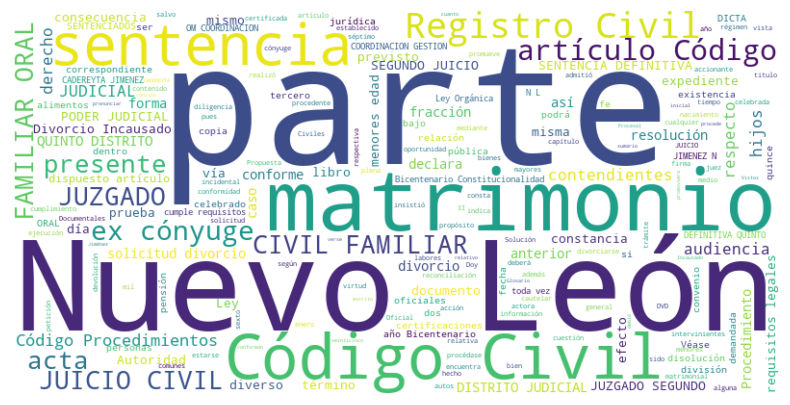

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text_no_stopwords)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializa el vectorizador
vectorizer = TfidfVectorizer(max_features=500)  # Limita a 500 palabras más frecuentes
tfidf_matrix = vectorizer.fit_transform([cleaned_text_no_stopwords])

# Obtén las palabras clave
top_words = vectorizer.get_feature_names_out()

# Imprime las palabras clave
print("Palabras clave:", top_words)

Palabras clave: ['acceso' 'accionante' 'acción' 'acorde' 'acreditada' 'acreditado'
 'acreditar' 'acreedora' 'acta' 'actas' 'actora' 'actos' 'actuaciones'
 'acudan' 'acuerdo' 'además' 'admisible' 'admisión' 'admitió' 'adscrita'
 'advirtiéndose' 'ahora' 'alguna' 'alguno' 'alimenticia' 'alimentos'
 'allegada' 'allegados' 'alternativos' 'ambos' 'analizada' 'anexos'
 'anexó' 'anotaciones' 'antecede' 'anterior' 'antonio' 'aplicación'
 'aprobación' 'aquella' 'artículo' 'artículos' 'asegurará' 'asimismo'
 'asistiendo' 'así' 'atendiendo' 'atento' 'audiencia' 'aun' 'autentifica'
 'autoridad' 'autoriza' 'autos' 'autónomo' 'auxilio' 'año' 'bajo'
 'bicentenario' 'bien' 'bienes' 'bis' 'blanca' 'boletín' 'cadereyta'
 'cambiado' 'capacidad' 'capítulo' 'cargo' 'carácter' 'caso' 'casos'
 'cautelar' 'celebrada' 'celebrado' 'celebraron' 'certificaciones'
 'certificación' 'certificada' 'certificadas' 'circunstancias' 'citada'
 'civil' 'civiles' 'compensatoria' 'competencia' 'competente'
 'comprobarlo' 'com

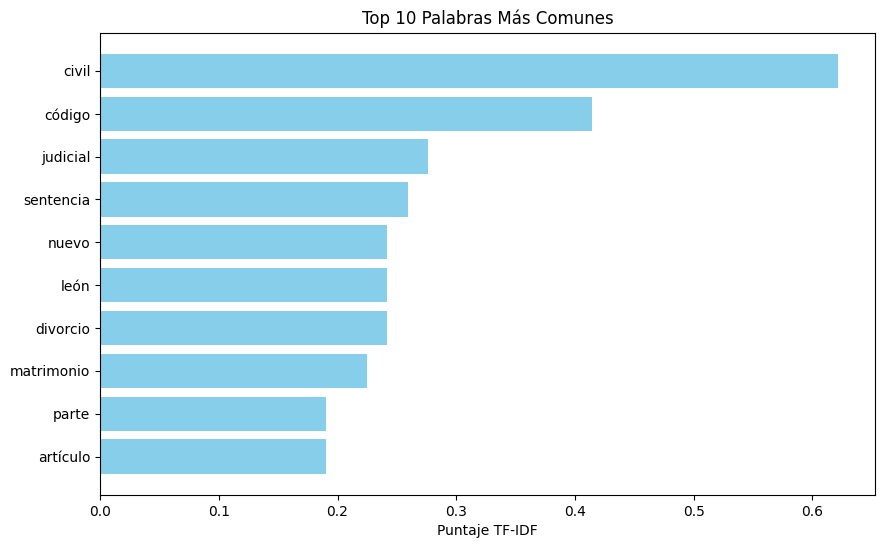

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Inicializa el vectorizador
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(max_features=10)  # Limita a 10 palabras más frecuentes
tfidf_matrix2 = vectorizer2.fit_transform([cleaned_text_no_stopwords])

# Obtén las palabras clave y sus respectivos valores TF-IDF
top_words_10 = vectorizer2.get_feature_names_out()
top_tfidf_scores_10 = np.array(tfidf_matrix2.sum(axis=0)).flatten()

# Ordena las palabras por su puntaje TF-IDF
sorted_indices = np.argsort(top_tfidf_scores_10)[::-1]
top_words_sorted = top_words_10[sorted_indices]
top_scores_sorted = top_tfidf_scores_10[sorted_indices]

#  Grafica de barras
plt.figure(figsize=(10, 6))
plt.barh(top_words_sorted, top_scores_sorted, color='skyblue')
plt.xlabel('Puntaje TF-IDF')
plt.title('Top 10 Palabras Más Comunes')
plt.gca().invert_yaxis()
plt.show()

Una de la parte importante del analisis de la sentencia es saber eliminar las palabras que no sirven o no son utiles.  El tener identificado tambien las palabras que mas se repiten permite identificar que palabras podrian repetirse en todas las sentencias, tal es el caso de la palabra "sentencia", que esta es utilizada como titulo de cada pagina de la sentencia. De igual manera la palabra código, que hace referencia a la utilizacion del documento que contiene las leyes.

In [7]:
# Se agregan palabras dummy positivas / negativas para identificar si la sentencia es positiva o negativa.
positive_words = [
    "acreditada", "acreditado", "declaración", "conformidad", "cumple",
    "cumplimiento", "definitiva", "procedente", "resolución", "justicia",
    "legal", "autentifica", "reconocimiento", "competente", "derechos",
    "mediación", "capacidad", "aprobación", "publicidad", "subsiste", "comprueba"
]

negative_words = [
    "divorcio", "disolución", "rechazo", "incumplimiento", "incausado",
    "problemático", "extinción", "alegación", "conflicto", "contendientes",
    "controversias", "incidental", "problemático", "inecesario", "motivo",
    "modificación", "resolutivos", "pérdida", "argumentación", "alegaciones"
]

In [8]:
# Función para analizar el sentimiento
def sentiment_analysis_top_words(words, positive_lexicon, negative_lexicon):
    positive_count = sum(1 for word in words if word in positive_lexicon)
    negative_count = sum(1 for word in words if word in negative_lexicon)
    return positive_count, negative_count

# Aplicar la función a las palabras más frecuentes
positive_count, negative_count = sentiment_analysis_top_words(top_words, positive_words, negative_words)

# Resultado del analisis
print(f"Palabras positivas encontradas: {positive_count}")
print(f"Palabras negativas encontradas: {negative_count}")

# Determinar sentimiento general
if positive_count > negative_count:
    print("Sentimiento General: Positivo")
elif negative_count > positive_count:
    print("Sentimiento General: Negativo")
else:
    print("Sentimiento General: Neutro") # Si es empate es neutro.


Palabras positivas encontradas: 19
Palabras negativas encontradas: 10
Sentimiento General: Positivo


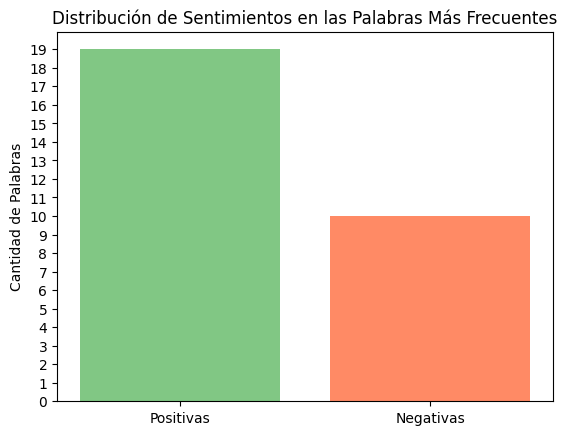

In [9]:
import matplotlib.pyplot as plt

# Datos que se utilizaran en la grafica Positivas - Negativas
categories = ['Positivas', 'Negativas']
counts = [positive_count, negative_count]

# Gráfico de barras
plt.bar(categories, counts, color=['#81C784', '#FF8A65'])
plt.title('Distribución de Sentimientos en las Palabras Más Frecuentes')
plt.ylabel('Cantidad de Palabras')
plt.yticks(range(0, int(max(counts)) + 1))  # Asegura que los números sean enteros

plt.show()
